## Phi 3.5 Vision Instruct

In [1]:
from PIL import Image
import base64
import io
import os
from dotenv import load_dotenv

load_dotenv()

SAFETY_PROMPT = """
Here's a safety inspection checklist for security issues on a construction site:

Description: explanation of what you see

Protective Gear: Are all workers wearing helmets, safety vests, gloves, and steel-toed boots?
Scaffolding: Are scaffoldings properly erected and secured? Any signs of wear or instability?
Fall Protection: Are guardrails, safety nets, or personal fall arrest systems in place where needed?
Machinery and Equipment: Are all tools and machinery in good working condition? Are they being used safely?
Electrical Safety: Are wires and cables properly insulated and secured? Any signs of exposed wiring?
Hazardous Materials: Are chemicals and materials properly stored and labeled? Any leaks or spills?
Housekeeping: Is the site clean and organized? Any debris or materials that could pose tripping hazards?
Signage: Are all safety signs visible and clear? Any missing or obscured warnings?
Emergency Exits: Are exit routes clear and accessible? Any obstructions that could impede a quick evacuation?
Fire Safety: Are fire extinguishers available and easily accessible? Are they inspected and up to date
Other: Include any other safety issue that you might spot.

For each item in the checklist, prefix the answer with a (color) that represents the potential risk: undetermined or situation can not be assessed (green), medium (orange), high risk (red). 
"""

USER_PROMPT = 'Analyze the image and detect any safety issues.'

def image_to_base64(image_path):
    # Open the image file
    with Image.open(image_path) as img:
        # Create a BytesIO object to hold the image data
        buffered = io.BytesIO()
        # Save the image to the BytesIO object in a specific format (e.g., JPEG)
        img.save(buffered, format="PNG")
        # Get the byte data from the BytesIO object
        img_bytes = buffered.getvalue()
        # Encode the byte data to base64
        img_base64 = base64.b64encode(img_bytes).decode('utf-8')
        return img_base64
    
def image_view(image_file):
    """
    View image
    """
    if not os.path.exists(image_file):
        print(f"[Error] Image file {image_file} does not exist.")
        return None

    else:
        img = Image.open(image_file)
        display(img)

## Construction Site images analysis

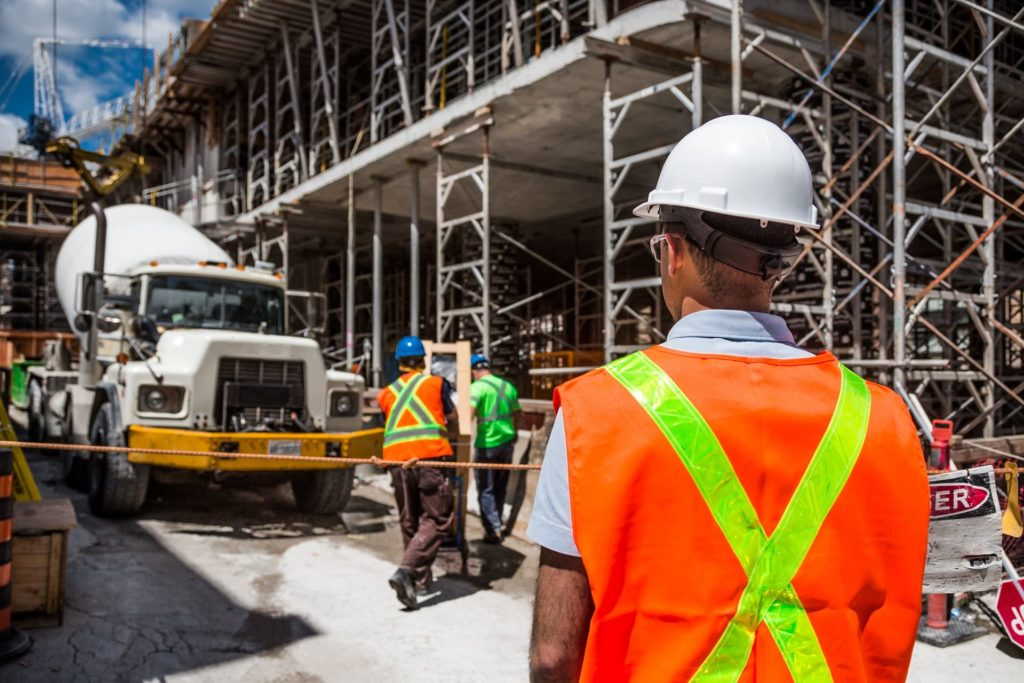

Analysis for construction-safety.jpg:
 
Protective Gear: All workers are wearing helmets, safety vests, gloves, and steel-toed boots. (green)
Scaffolding: The scaffolding appears to be properly erected and secured. No signs of wear or instability are visible. (green)
Fall Protection: Guardrails and safety nets are in place where needed. (green)
Machinery and Equipment: All tools and machinery appear to be in good working condition and are being used safely. (green)
Electrical Safety: Wires and cables are properly insulated and secured. No exposed wiring is visible. (green)
Hazardous Materials: Chemicals and materials are properly stored and labeled. No leaks or spills are visible. (green)
Housekeeping: The site is clean and organized. No debris or materials that could pose tripping hazards are visible. (green)
Signage: All safety signs are visible and clear. No missing or obscured warnings are visible. (green)
Emergency Exits: Exit routes are clear and accessible. No obstructions are v

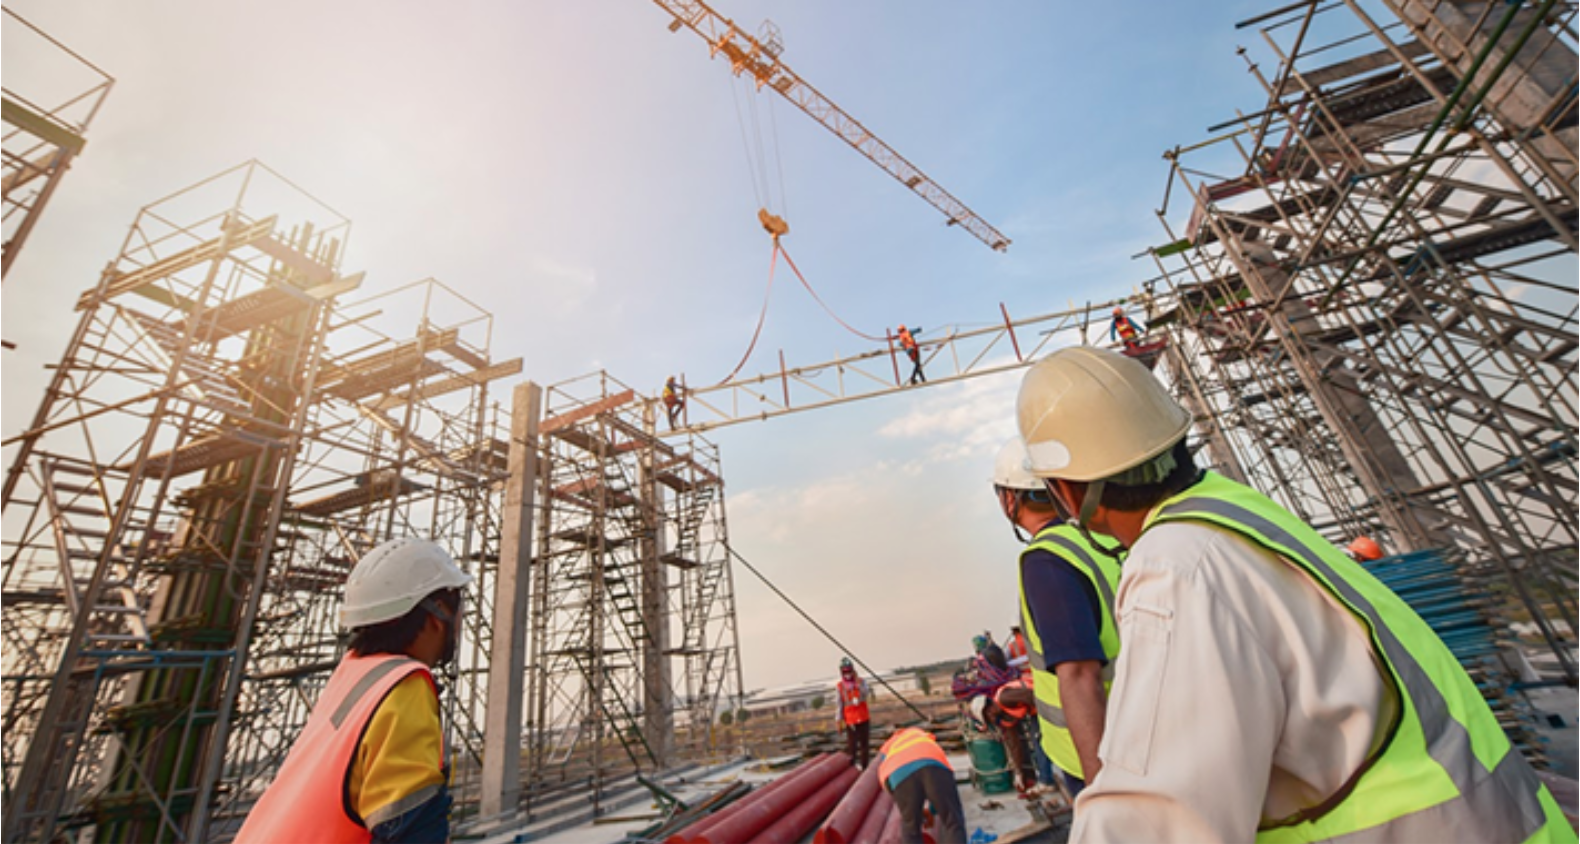

Analysis for kclmLW7dRj.png:
 
Protective Gear: All workers are wearing helmets, safety vests, gloves, and steel-toed boots. (green)
Scaffolding: The scaffolding appears to be properly erected and secured. No signs of wear or instability are visible. (green)
Fall Protection: Guardrails and safety nets are in place where needed. (green)
Machinery and Equipment: All tools and machinery appear to be in good working condition and are being used safely. (green)
Electrical Safety: Wires and cables are properly insulated and secured. No exposed wiring is visible. (green)
Hazardous Materials: Chemicals and materials are properly stored and labeled. No leaks or spills are visible. (green)
Housekeeping: The site is clean and organized. No debris or materials that could pose tripping hazards are visible. (green)
Signage: All safety signs are visible and clear. No missing or obscured warnings are visible. (green)
Emergency Exits: Exit routes are clear and accessible. No obstructions are visible th

In [2]:
%%time

from azure.ai.inference.models import TextContentItem, ImageContentItem, ImageUrl
from azure.ai.inference.models import UserMessage, SystemMessage
from azure.ai.inference import ChatCompletionsClient
from azure.core.credentials import AzureKeyCredential

def process_images_in_folder(folder_path):
    client = ChatCompletionsClient(
        endpoint=os.environ["AZURE_INFERENCE_ENDPOINT"],
        credential=AzureKeyCredential(os.environ["AZURE_INFERENCE_CREDENTIAL"]),
    )

    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            image_path = os.path.join(folder_path, filename)
            base64_image = image_to_base64(image_path)
            data_url = f"data:image/jpeg;base64,{base64_image}"
            image_url = ImageUrl(url=data_url)
            image_view(image_path)

            response = client.complete(
                messages=[
                    SystemMessage(content=SAFETY_PROMPT),
                    UserMessage(content=[
                        TextContentItem(text=USER_PROMPT),
                        ImageContentItem(image_url=image_url)
                    ]),
                ],
                temperature=0,
                top_p=1,
                max_tokens=2048,
            )

            print(f"Analysis for {filename}:")
            print(response.choices[0].message.content)
            print("\n")

process_images_in_folder('./images')
